In [1]:
%matplotlib notebook
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
team_id = "DET"

In [5]:
engine = create_engine(f"sqlite:///{team_id}_drafts.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['draft']

In [8]:
# Save references to each table
Draft = Base.classes.draft

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

<IPython.core.display.Javascript object>


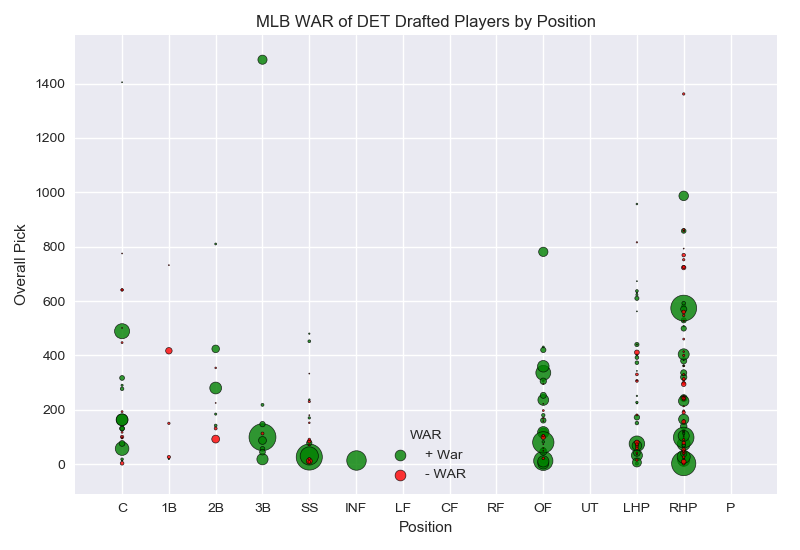

Size of the point equated to WAR total.


In [10]:
# Perform a query to retrieve the data and precipitation scores
positive_war = session.query(Draft.OvPck, Draft.Year, Draft.Name, Draft.WAR).\
    filter(Draft.WAR > 0).filter(Draft.Signed == 'Y').all()
negative_war = session.query(Draft.OvPck, Draft.Year, Draft.Name, Draft.WAR).\
    filter(Draft.WAR < 0).filter(Draft.Signed == 'Y').all()
# Save the query results as a Pandas DataFrame and set the index to the date column
positive_war_df = pd.DataFrame(data=positive_war, columns=["Overall Pick", "Year", "Player", "WAR"])
negative_war_df = pd.DataFrame(data=negative_war, columns=["Overall Pick", "Year", "Player", "WAR"])
# Use Pandas Plotting with Matplotlib to plot the data
positive = plt.scatter(positive_war_df["Year"], positive_war_df["Overall Pick"], s=5*positive_war_df["WAR"], c="green", alpha=.8, linewidths=.5, edgecolors="black", label="+ War")
negative = plt.scatter(negative_war_df["Year"], negative_war_df["Overall Pick"], s=-5*negative_war_df["WAR"], c="red", alpha=.8, linewidths=.5, edgecolors="black", label="- WAR")

lgnd = plt.legend(fontsize="medium", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="WAR", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [60]
lgnd.legendHandles[1]._sizes = [60]

plt.title(f"MLB WAR of {team_id} Drafted Players by Year")
plt.ylabel('Overall Pick')
plt.xlabel('Year')
plt.show()
print("Size of the point equated to WAR total.")
plt.savefig(f"Images/{team_id}_draft_bubble.png")

In [11]:
# Perform a query to retrieve the data and precipitation scores
positive_position_war = session.query(Draft.OvPck, Draft.Pos, Draft.Name, Draft.WAR).\
    filter(Draft.WAR > 0).filter(Draft.Signed == 'Y').all()
negative_position_war = session.query(Draft.OvPck, Draft.Pos, Draft.Name, Draft.WAR).\
    filter(Draft.WAR < 0).filter(Draft.Signed == 'Y').all()
# Save the query results as a Pandas DataFrame and set the index to the date column
positive_position_war_df = pd.DataFrame(data=positive_position_war, columns=["Overall Pick", "Position", "Player", "WAR"])
negative_position_war_df = pd.DataFrame(data=negative_position_war, columns=["Overall Pick", "Position", "Player", "WAR"])

positive_position_c = positive_position_war_df.loc[positive_position_war_df["Position"] == 'C']
negative_position_c = negative_position_war_df.loc[negative_position_war_df["Position"] == 'C']

positive_position_1b = positive_position_war_df.loc[positive_position_war_df["Position"] == '1B']
negative_position_1b = negative_position_war_df.loc[negative_position_war_df["Position"] == '1B']
                                   
positive_position_2b = positive_position_war_df.loc[positive_position_war_df["Position"] == '2B']
negative_position_2b = negative_position_war_df.loc[negative_position_war_df["Position"] == '2B']
                                   
positive_position_3b = positive_position_war_df.loc[positive_position_war_df["Position"] == '3B']
negative_position_3b = negative_position_war_df.loc[negative_position_war_df["Position"] == '3B']

positive_position_ss = positive_position_war_df.loc[positive_position_war_df["Position"] == 'SS']
negative_position_ss = negative_position_war_df.loc[negative_position_war_df["Position"] == 'SS']

positive_position_inf = positive_position_war_df.loc[positive_position_war_df["Position"] == 'INF']
negative_position_inf = negative_position_war_df.loc[negative_position_war_df["Position"] == 'INF']

positive_position_lf = positive_position_war_df.loc[positive_position_war_df["Position"] == 'LF']
negative_position_lf = negative_position_war_df.loc[negative_position_war_df["Position"] == 'LF']

positive_position_cf = positive_position_war_df.loc[positive_position_war_df["Position"] == 'CF']
negative_position_cf = negative_position_war_df.loc[negative_position_war_df["Position"] == 'CF']

positive_position_rf = positive_position_war_df.loc[positive_position_war_df["Position"] == 'RF']
negative_position_rf = negative_position_war_df.loc[negative_position_war_df["Position"] == 'RF']

positive_position_of = positive_position_war_df.loc[positive_position_war_df["Position"] == 'OF']
negative_position_of = negative_position_war_df.loc[negative_position_war_df["Position"] == 'OF']

positive_position_ut = positive_position_war_df.loc[positive_position_war_df["Position"] == 'UT']
negative_position_ut = negative_position_war_df.loc[negative_position_war_df["Position"] == 'UT']

positive_position_lhp = positive_position_war_df.loc[positive_position_war_df["Position"] == 'LHP']
negative_position_lhp = negative_position_war_df.loc[negative_position_war_df["Position"] == 'LHP']

positive_position_rhp = positive_position_war_df.loc[positive_position_war_df["Position"] == 'RHP']
negative_position_rhp = negative_position_war_df.loc[negative_position_war_df["Position"] == 'RHP']

positive_position_p = positive_position_war_df.loc[positive_position_war_df["Position"] == 'P']
negative_position_p = negative_position_war_df.loc[negative_position_war_df["Position"] == 'P']

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.scatter(np.full(len(positive_position_c), 0), positive_position_c["Overall Pick"], s=5*positive_position_c["WAR"], c="green", alpha=.8, linewidths=.5, edgecolors="black", label="+ War")
plt.scatter(np.full(len(negative_position_c), 0), negative_position_c["Overall Pick"], s=-5*negative_position_c["WAR"], c="red", alpha=.8, linewidths=.5, edgecolors="black", label="- WAR")

plt.scatter(np.full(len(positive_position_1b), 1), positive_position_1b["Overall Pick"], s=5*positive_position_1b["WAR"], c="green", alpha=.8, linewidths=.5, edgecolors="black")
plt.scatter(np.full(len(negative_position_1b), 1), negative_position_1b["Overall Pick"], s=-5*negative_position_1b["WAR"] , c="red", alpha=.8, linewidths=.5, edgecolors="black")

plt.scatter(np.full(len(positive_position_2b), 2), positive_position_2b["Overall Pick"], s=5*positive_position_2b["WAR"], c="green", alpha=.8, linewidths=.5, edgecolors="black")
plt.scatter(np.full(len(negative_position_2b), 2), negative_position_2b["Overall Pick"], s=-5*negative_position_2b["WAR"], c="red", alpha=.8, linewidths=.5, edgecolors="black")

plt.scatter(np.full(len(positive_position_3b), 3), positive_position_3b["Overall Pick"], s=5*positive_position_3b["WAR"], c="green", alpha=.8, linewidths=.5, edgecolors="black")
plt.scatter(np.full(len(negative_position_3b), 3), negative_position_3b["Overall Pick"], s=-5*negative_position_3b["WAR"], c="red", alpha=.8, linewidths=.5, edgecolors="black")

plt.scatter(np.full(len(positive_position_ss), 4), positive_position_ss["Overall Pick"], s=5*positive_position_ss["WAR"], c="green", alpha=.8, linewidths=.5, edgecolors="black")
plt.scatter(np.full(len(negative_position_ss), 4), negative_position_ss["Overall Pick"], s=-5*negative_position_ss["WAR"], c="red", alpha=.8, linewidths=.5, edgecolors="black")

plt.scatter(np.full(len(positive_position_inf), 5), positive_position_inf["Overall Pick"], s=5*positive_position_inf["WAR"], c="green", alpha=.8, linewidths=.5, edgecolors="black")
plt.scatter(np.full(len(negative_position_inf), 5), negative_position_inf["Overall Pick"], s=-5*negative_position_inf["WAR"], c="red", alpha=.8, linewidths=.5, edgecolors="black")

plt.scatter(np.full(len(positive_position_lf), 6), positive_position_lf["Overall Pick"], s=5*positive_position_lf["WAR"], c="green", alpha=.8, linewidths=.5, edgecolors="black")
plt.scatter(np.full(len(negative_position_lf), 6), negative_position_lf["Overall Pick"], s=-5*negative_position_lf["WAR"], c="red", alpha=.8, linewidths=.5, edgecolors="black")

plt.scatter(np.full(len(positive_position_cf), 7), positive_position_cf["Overall Pick"], s=5*positive_position_cf["WAR"], c="green", alpha=.8, linewidths=.5, edgecolors="black")
plt.scatter(np.full(len(negative_position_cf), 7), negative_position_cf["Overall Pick"], s=-5*negative_position_cf["WAR"], c="red", alpha=.8, linewidths=.5, edgecolors="black")

plt.scatter(np.full(len(positive_position_rf), 8), positive_position_rf["Overall Pick"], s=5*positive_position_rf["WAR"], c="green", alpha=.8, linewidths=.5, edgecolors="black")
plt.scatter(np.full(len(negative_position_rf), 8), negative_position_rf["Overall Pick"], s=-5*negative_position_rf["WAR"], c="red", alpha=.8, linewidths=.5, edgecolors="black")

plt.scatter(np.full(len(positive_position_of), 9), positive_position_of["Overall Pick"], s=5*positive_position_of["WAR"], c="green", alpha=.8, linewidths=.5, edgecolors="black")
plt.scatter(np.full(len(negative_position_of), 9), negative_position_of["Overall Pick"], s=-5*negative_position_of["WAR"], c="red", alpha=.8, linewidths=.5, edgecolors="black")

plt.scatter(np.full(len(positive_position_ut), 10), positive_position_ut["Overall Pick"], s=5*positive_position_ut["WAR"], c="green", alpha=.8, linewidths=.5, edgecolors="black")
plt.scatter(np.full(len(negative_position_ut), 10), negative_position_ut["Overall Pick"], s=-5*negative_position_ut["WAR"], c="red", alpha=.8, linewidths=.5, edgecolors="black")

plt.scatter(np.full(len(positive_position_lhp), 11), positive_position_lhp["Overall Pick"], s=5*positive_position_lhp["WAR"], c="green", alpha=.8, linewidths=.5, edgecolors="black")
plt.scatter(np.full(len(negative_position_lhp), 11), negative_position_lhp["Overall Pick"], s=-5*negative_position_lhp["WAR"], c="red", alpha=.8, linewidths=.5, edgecolors="black")

plt.scatter(np.full(len(positive_position_rhp), 12), positive_position_rhp["Overall Pick"], s=5*positive_position_rhp["WAR"], c="green", alpha=.8, linewidths=.5, edgecolors="black")
plt.scatter(np.full(len(negative_position_rhp), 12), negative_position_rhp["Overall Pick"], s=-5*negative_position_rhp["WAR"], c="red", alpha=.8, linewidths=.5, edgecolors="black")

plt.scatter(np.full(len(positive_position_p), 13), positive_position_p["Overall Pick"], s=5*positive_position_p["WAR"], c="green", alpha=.8, linewidths=.5, edgecolors="black")
plt.scatter(np.full(len(negative_position_p), 13), negative_position_p["Overall Pick"], s=-5*negative_position_p["WAR"], c="red", alpha=.8, linewidths=.5, edgecolors="black")

plt.title(f"MLB WAR of {team_id} Drafted Players by Position")
plt.ylabel('Overall Pick')
plt.xlabel('Position')
plt.xlim(-1,14)
plt.tight_layout()
x_axis = [i for i in range(14)]
x_axis_labels = ['C', '1B', '2B', '3B', 'SS', 'INF', 'LF', 'CF', 'RF', 'OF', 'UT', 'LHP', 'RHP', 'P']
plt.xticks(x_axis, x_axis_labels)
print("Size of the point equated to WAR total.")
plt.savefig(f"Images/{team_id}_draft_bubble_position.png")
plt.show()

Size of the point equated to WAR total.


In [13]:
positive_state_war = session.query(Draft.ST, func.sum(Draft.WAR)).\
    filter(Draft.WAR > 0).filter(Draft.Signed == 'Y').\
    group_by(Draft.ST).order_by(func.sum(Draft.WAR).desc()).all()
negative_state_war = session.query(Draft.ST, func.sum(Draft.WAR)).\
    filter(Draft.WAR < 0).filter(Draft.Signed == 'Y').\
    group_by(Draft.ST).order_by(func.sum(Draft.WAR).desc()).all()
positive_state_war_df = pd.DataFrame(data=positive_state_war, columns=["State", "WAR"])
negative_state_war_df = pd.DataFrame(data=negative_state_war, columns=["State", "WAR"])
negative_state_war_df

,State,WAR
0,IA,-0.1
1,NJ,-0.1
2,QC,-0.1
3,UT,-0.2
4,KY,-0.3
5,WI,-0.3
6,LA,-0.4
7,AR,-0.5
8,MN,-0.5
9,NC,-0.5
